# Laboratorio 5

Se proporciona el archivo UK_foods.csv, que contiene datos del consumo, en gramos, por persona por semana de diferentes comidas en cuatro países del Reino Unido.

### Import libraries

In [582]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

### Read data from csv file

In [583]:
df = pd.read_csv("UK_foods.csv")
df.columns.values[0] = "Foods"
df.head(5)

,Foods,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


### Data exploration


Dataframe shape: 
(17, 5)

Dataframe columns: 
Index(['Foods', 'England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

Dataframe describe: 
           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


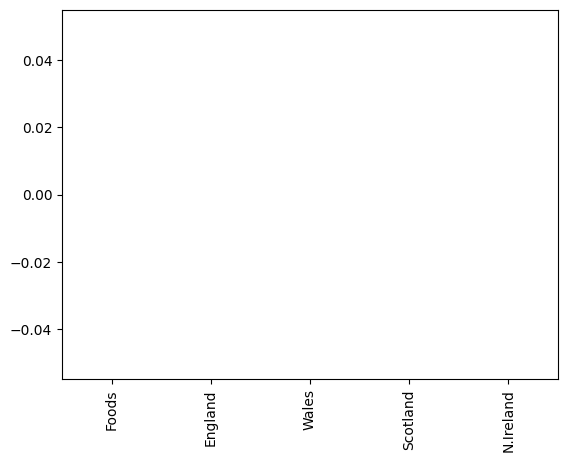

In [584]:
# Data exploration
print("\nDataframe shape: ")
print(df.shape)

print("\nDataframe columns: ")
print(df.columns)

print("\nDataframe describe: ")
print(df.describe())

# plot empty values
df.isnull().sum().plot(kind='bar')
plt.show()

### Data preprocessing

In [585]:
# Normalize data
df["England"] = df["England"] / df["England"].max()
df["Wales"] = df["Wales"] / df["Wales"].max()
df["Scotland"] = df["Scotland"] / df["Scotland"].max()
df["N.Ireland"] = df["N.Ireland"] / df["N.Ireland"].max()

# Flip rows and columns
transposedDF = df.T
transposedDF.columns = transposedDF.iloc[0]
transposedDF = transposedDF.iloc[1:]
df = transposedDF

df.head()

Foods,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,0.071332,0.16644,0.465353,0.099864,0.131114,0.105978,0.48913,0.171875,0.331522,0.134511,0.244565,0.748641,1.0,0.038723,0.933424,0.254755,0.036685
Wales,0.065107,0.143489,0.507585,0.101138,0.148546,0.110619,0.552465,0.167509,0.360303,0.128319,0.230721,0.71871,1.0,0.046144,0.793932,0.300253,0.040455
Scotland,0.065522,0.153944,0.477099,0.077608,0.117048,0.093511,0.360051,0.108779,0.265903,0.139949,0.214377,0.608779,0.930025,0.033715,1.0,0.291349,0.03944
N.Ireland,0.043825,0.177291,0.38911,0.061753,0.138778,0.092297,0.685923,0.094954,0.235724,0.12417,0.22178,0.447543,0.992032,0.031208,1.0,0.089641,0.027224


### Create model

Epoch 1/1000
1/1 [==============================] - 0s 318ms/step - loss: 0.1358 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1353 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1348 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1343 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1338 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1332 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1327 - accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1322 - accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1317 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 

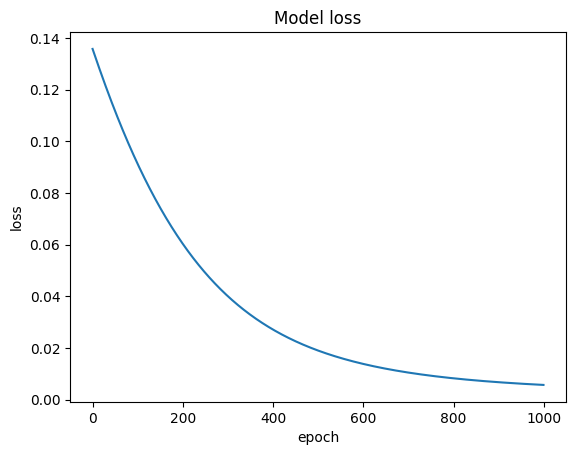

In [586]:
input_dim = df.shape[1]
encoding_dim = 2
inputData = tf.convert_to_tensor(df.values, dtype=tf.float32)

autoencoder = Sequential([
    Dense(input_dim, activation='relu', input_shape=(input_dim,)),
    Dense(encoding_dim, activation='relu'),
    Dense(encoding_dim, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['accuracy']
)

num_epochs = 1000
batch_size = 10

history = autoencoder.fit(
    inputData,
    inputData,
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=1
).history

plt.plot(history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Evaluate model

In [587]:
# Evaluate model using reconstruction error
predictions = autoencoder.predict(inputData)
mse = np.mean(np.power(inputData - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': df.index})

print("Mean squared error: " + str(np.mean(mse)))

1/1 [==============================] - 0s 39ms/step
Mean squared error: 0.0057274047


### Data visualization

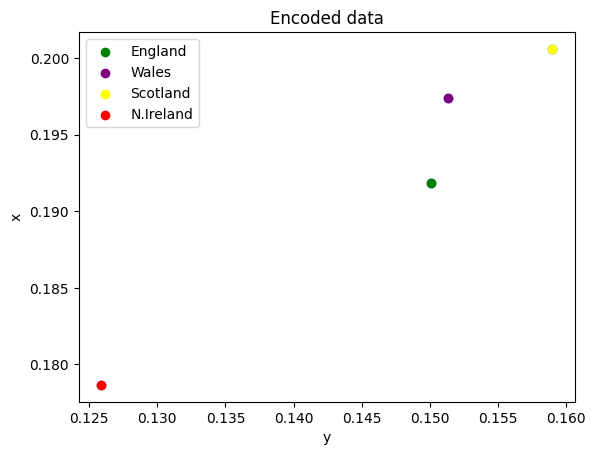

In [589]:
plt.scatter(predictions[:, 0], predictions[:, 1])
plt.title('Encoded data')
plt.ylabel('x')
plt.xlabel('y')

colors = ['green', 'purple', 'yellow', 'red']
countries = ["England", "Wales", "Scotland", "N.Ireland"]
for i, country in enumerate(countries):
    plt.scatter(predictions[i, 0], predictions[i, 1], color=colors[i], label=country)
    
plt.legend()
plt.show()

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fontheworldmap.com%2Fuk%2Funited-kingdom-map-1500.jpg&f=1&nofb=1&ipt=7ac967757f23f22b2e54876b234f2e241fbd836bc716ac5a618b1f9fefae3eb3&ipo=images" width="400" height="400" />

### Insights
Estas dos dimensiones son las que explican la mayor parte de la variabilidad en los datos. Por lo tanto, podemos usarlas para visualizar los datos en un gráfico de dispersión.

1. ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?

La gráfica de dispersión nos permite hacer las siguientes observaciones:
- Los patrones de consumo son similares en los países de Gales, Inglaterra y Escocia, ya que están cerca en el gráfico de dispersión.
- Irlanda del Norte tiene un patrón de consumo notablemente diferente, ya que aparece alejado de los otros países en la gráfica.
- Ambas dimensiones muestran similares diferencias en los patrones de consumo.

Histórica y económicamente, hay varias razones que podrían explicar las diferencias en los patrones de consumo entre los países del Reino Unido. Algunas consideraciones que podrían influir incluyen:
- Los conflictos históricos y desafíos económicos en Irlanda del Norte.
- Los diferentes países del Reino Unido tienen economías y geografías que favorecen diferentes tipos de producción agrícola, como la cría de ovejas en Gales, la producción de carne de res en Escocia, y la diversidad agrícola en Inglaterra.
- Las tradiciones culinarias y festividades locales.
- El acceso al comercio y la ubicación geográfica pueden afectar la disponibilidad y el precio de ciertos alimentos.

En resumen, Gales, Inglaterra y Escocia tienen patrones de consumo similares, mientras que Irlanda del Norte se destaca con un patrón diferente. Esto puede deberse a factores culturales, económicos, geográficos o históricos.

2. ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?

El error de reconstrucción es una métrica de rendimiento que mide la calidad de la reconstrucción de los datos originales. En este caso, el error de reconstrucción es de 0.0057274047, lo que significa que el modelo puede reconstruir los datos originales con más de 99% de precisión. Por lo tanto, podemos decir que el modelo hizo un buen trabajo al reducir la dimensionalidad.